In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df=pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [73]:
df.duplicated().sum()   # too check dupilicated rows

np.int64(0)

In [74]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [75]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [76]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [77]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [79]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [80]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [82]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [83]:
X_train.shape

(8000, 11)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [85]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [86]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense

In [87]:
model = Sequential()
model.add(Dense(12,activation='relu',input_dim=11))  # hidden layer
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # output layer

c:\vs code\Data Science\myNotebooks\Deep-Learning\deep_venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313 (1.22 KB)

 Trainable params: 313 (1.22 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [90]:
history=model.fit(X_train_scaled,y_train,epochs=120,validation_split=0.2)  # validation split means 8000 data mai se 20 percent data alag kar ke fir unn 20percent ke upar test karega kii uska result kaisa aa rha h fir accuracy dega 

Epoch 1/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6066 - loss: 0.6660 - val_accuracy: 0.7975 - val_loss: 0.4987
Epoch 2/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4768 - val_accuracy: 0.7969 - val_loss: 0.4568
Epoch 3/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.4302 - val_accuracy: 0.7975 - val_loss: 0.4479
Epoch 4/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8114 - loss: 0.4413 - val_accuracy: 0.7994 - val_loss: 0.4423
Epoch 5/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8226 - loss: 0.4201 - val_accuracy: 0.8050 - val_loss: 0.4357
Epoch 6/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8179 - loss: 0.4310 - val_accuracy: 0.8081 - val_loss: 0.4306
Epoch 7/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8284 - loss: 0.4110 - val_accuracy: 0.8125 - val_loss: 0.4252
Epoch 8/120
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8387 - loss: 0.4048 - val_accu

In [91]:
model.layers[0].get_weights() # 33 weights and 3 biases

[array([[-0.08094469, -0.07703377, -0.0392893 , -0.16860801, -0.28762463,
          0.21739924,  0.0160443 , -0.4221977 , -0.08306704, -0.2096798 ,
          0.05048573,  0.12592852],
        [-0.3674057 ,  0.6307534 , -0.4754739 , -0.69338924, -0.19883573,
         -0.43561342,  0.42803898,  1.3150928 , -0.1238244 ,  0.20584457,
         -0.496053  ,  0.47685793],
        [ 0.11383232, -0.04464236, -0.12401658, -0.07226953,  0.0822235 ,
         -0.39037135,  0.15877846, -0.20284292, -0.28236663,  0.24919757,
         -0.4842086 ,  0.2559775 ],
        [ 0.5136399 ,  0.1748721 , -0.42972055,  0.05331944, -1.0575709 ,
         -0.42182395, -0.29323205, -0.01833845, -0.0387117 ,  0.49980903,
          0.74044824, -0.7900059 ],
        [ 0.07118368,  0.7160175 , -0.0352117 , -0.01572486, -0.12736405,
         -0.10606194, -1.3759682 , -0.6147544 ,  1.4981222 , -0.32647115,
         -0.4197775 , -0.17039444],
        [ 0.14436595, -0.20577262, -0.2472854 , -0.4635014 , -0.35108137,
      

In [92]:
model.layers[1].get_weights()  # 3 weights and 1 biases

[array([[-2.8398868e-01, -9.5116514e-01, -1.0553171e-01, -4.6875846e-01,
         -8.5064691e-01,  6.0124469e-01,  2.5171614e-01,  1.2028963e-01,
         -6.4744957e-02, -2.8480428e-01,  5.0895512e-01, -5.6761044e-01],
        [ 7.5102550e-01, -1.7341267e-01, -2.5608206e-01, -2.1394840e-02,
         -2.8615734e-01, -2.8419909e-01, -1.3946170e-01, -1.7519513e-01,
          2.5385305e-01,  6.1350840e-01,  2.1568884e-01,  2.8895691e-01],
        [-8.6477840e-01,  4.7553232e-01,  3.7522069e-01, -1.0333574e+00,
          1.3863270e-01,  6.4557105e-01,  6.0458171e-01,  2.6748255e-01,
          6.3812949e-02, -7.9762913e-02, -1.9776064e-01,  4.5150793e-01],
        [-5.5777627e-01, -3.1609750e-01, -3.3101952e-01, -1.6767170e+00,
         -4.7116107e-01,  3.9302066e-01,  4.9472755e-01,  1.7034465e-01,
         -1.2746039e-01, -6.2162146e-02,  1.7181867e-01, -2.1724413e-01],
        [-4.0285647e-01, -1.3521394e-01,  1.6080956e-01, -4.6767777e-01,
          5.9984756e-01,  7.3203566e-03,  3.609

In [93]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[0.03119071],
       [0.10636684],
       [0.06470017],
       ...,
       [0.0067501 ],
       [0.02402815],
       [0.5743284 ]], dtype=float32)

In [94]:
y_log=model.predict(X_test_scaled)
y_pred=np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.862

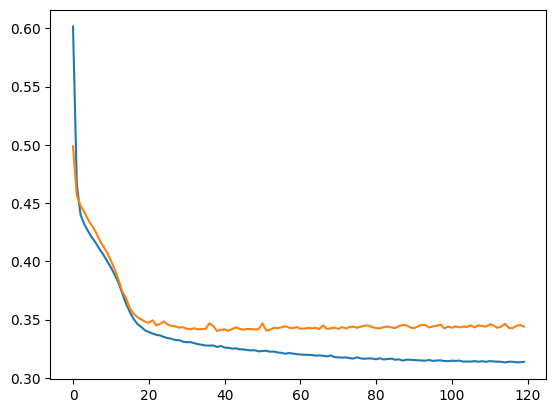

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

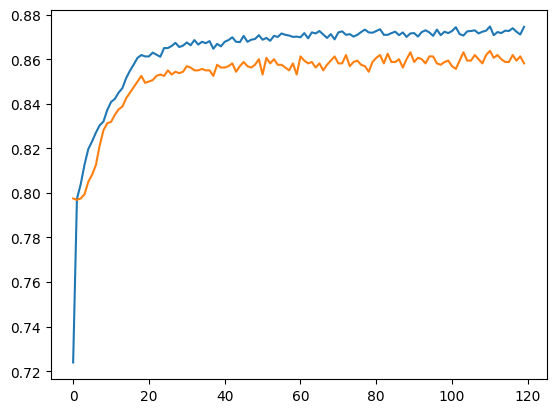

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])